<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

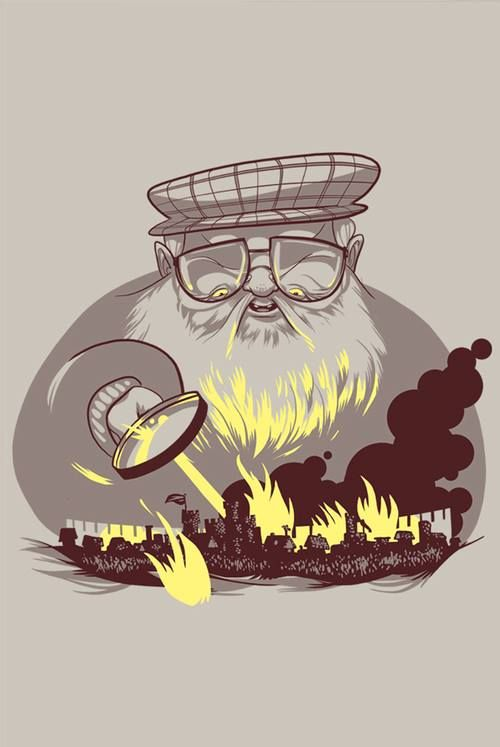

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 42.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 70.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [142]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

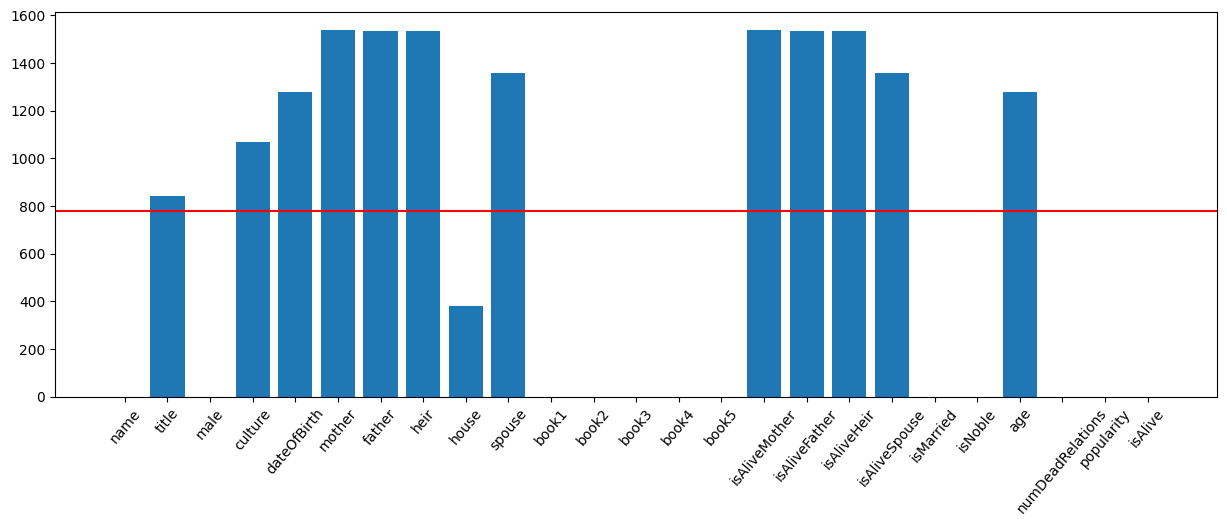

In [143]:
# отрисуем столбцы, где есть nan
nan_df = data.isna().sum()

plt.figure(figsize=(15,5))
plt.bar(nan_df.index, nan_df.values)
plt.axhline(y=(data.shape[0] // 2), color = 'r', linestyle = '-')
plt.xticks(rotation=50)
plt.show()

# альтернатива - таблица с non-null values
# data.info()

# Удалим все столбцы, где количество пропущенных значений больше половины
data.drop(["dateOfBirth", "mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "age"],
          inplace=True,
          axis="columns")

# осталься только столбец house. Он представляет из себя категориальные значения,
# поэтому замени его модой
data = data.fillna({"house":data["house"].mode()[0],
                    "culture":data["culture"].mode()[0],
                    "title":data["title"].mode()[0]})

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [144]:
data["isPopular"] = data["popularity"] > 0.5
data["boolDeadRelations"] = data["numDeadRelations"] != 0

In [145]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for culture, names in cult.items():
    for name in names:
        data["culture"] = data["culture"].str.lower().replace(name, culture)


In [172]:
cult_set = set(data["culture"].values)
house_set = set(data["house"].values)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

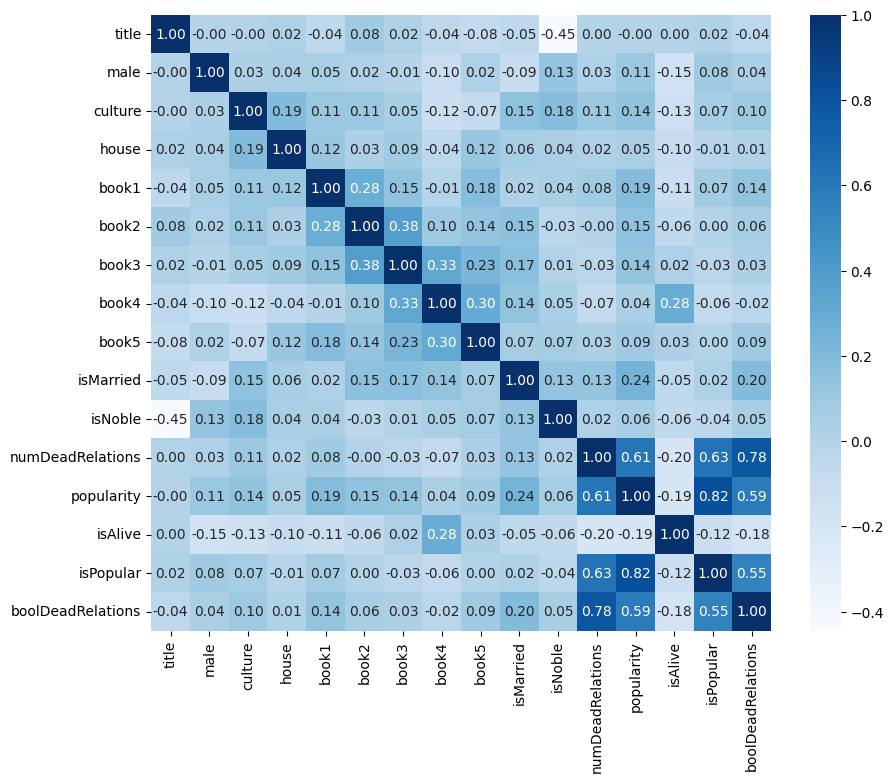

In [120]:
# используем LabelEncoder, так как One-Hot порождает слишком много
# столбцов, из-за чего невозможно оценивать корреляцию
from sklearn.preprocessing import LabelEncoder
le_title = LabelEncoder()
le_cult = LabelEncoder()
le_house = LabelEncoder()


# имя ни на что не влияет
data = data.drop("name", axis="columns")
cat_columns = data.select_dtypes(include=["object"]).columns.to_list()

data[cat_columns[0]] = le_title.fit_transform(data[cat_columns[0]])
data[cat_columns[1]] = le_cult.fit_transform(data[cat_columns[1]])
data[cat_columns[2]] = le_house.fit_transform(data[cat_columns[2]])

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.show()

In [121]:
data.drop(columns=["title", "book2", "book3", "book5", "isMarried", "isNoble"],
          inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


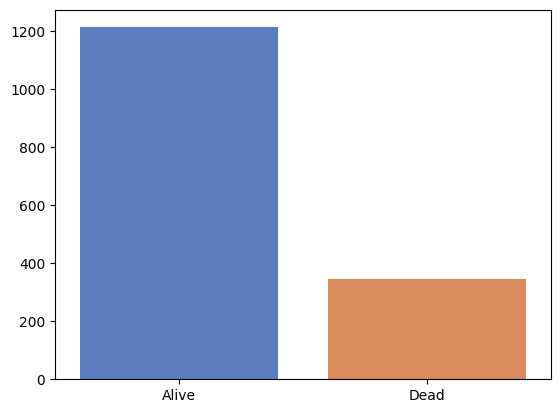

In [122]:
# Целевая переменная является категоиальной, так как описывает принадлежность
# персонажа к определённому классу.

sns.barplot(x=["Alive", "Dead"],
            y=data["isAlive"].value_counts().values,
            hue=["Alive", "Dead"],
            palette="muted")
plt.show()

<b>Датасет является несбалансированным</b>

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

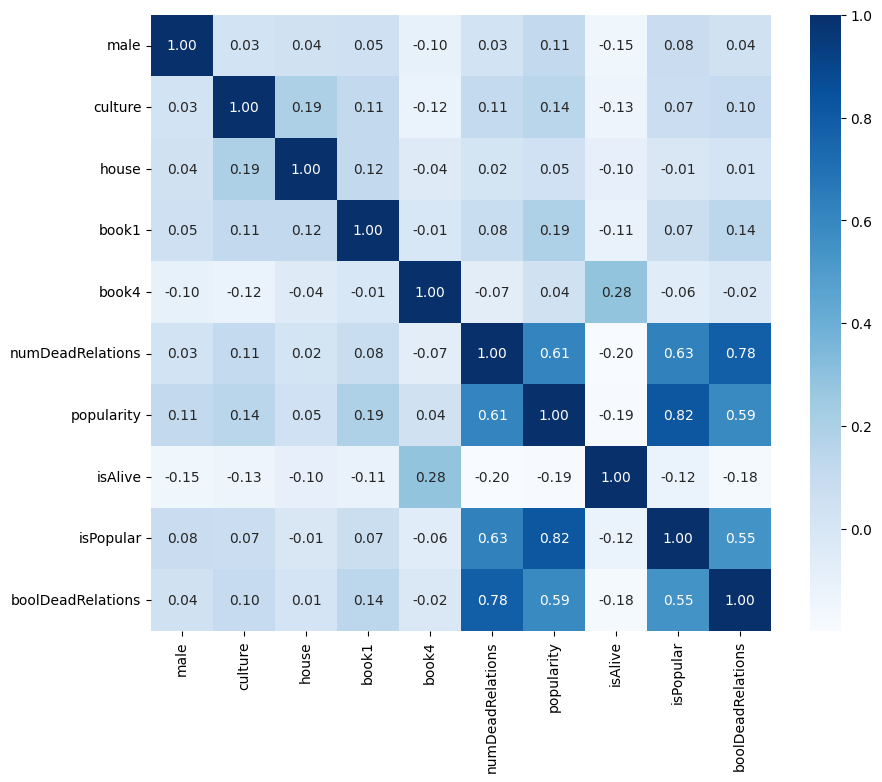

In [123]:
# делал ранее для "оценки и удаления ненужных"

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# Слабая коррекляция по Чеддоку между целевой переменной
# и всеми признаками

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [125]:
X = data.drop("isAlive", axis="columns")
y = data["isAlive"]

X.shape, y.shape

((1557, 9), (1557,))

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# выберем stratify по y, чтобы у нас сохранился хоть какой-то баланс
# классов между сплитами
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1245, 9), (1245,), (312, 9), (312,))

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [128]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [129]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [130]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_log = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [133]:
# Шаг 1. создание модели
ada_booster = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                                 n_estimators=60,
                                 learning_rate=0.7,
                                 random_state=42)
random_forest = RandomForestClassifier(n_estimators=200,
                                       max_depth=16,
                                       random_state=42)
gaussian_process = GaussianProcessClassifier(random_state=42)
gaussian_nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier(criterion="entropy",
                              max_depth=18,
                              random_state=42)

# Шаг 2. обучение модели
ada_booster.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_booster.predict(X_test)
y_pred_forest = random_forest.predict(X_test)
y_pred_gp = gaussian_process.predict(X_test)
y_pred_nb = gaussian_nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree.predict(X_test)

res = [y_pred_ada,
       y_pred_forest,
       y_pred_gp,
       y_pred_nb,
       y_pred_knn,
       y_pred_svc,
       y_pred_tree]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [134]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [135]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7981


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [136]:
# Шаг 3. Предсказание на тестовых данных
...

# Шаг 4. Оценка предсказания по метрике accuracy
for result in res:
    accuracy = accuracy_score(y_test, result)
    print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8333
Accuracy : 0.8045
Accuracy : 0.7308
Accuracy : 0.7756
Accuracy : 0.7724
Accuracy : 0.7788
Accuracy : 0.7340


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [137]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.4MB/s]


In [138]:
submission = pd.read_csv("/content/submission.csv", index_col="S.No")

Как сохранить измененный Pandas DataFrame в csv файл:

In [140]:
submission.to_csv("/content/new_submission.csv", index=False)

Повторяем все шаги предобработки, которые мы делали для train

In [181]:
test_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")
test_data.drop(["dateOfBirth", "mother", "father", "heir", "spouse", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "age"],
          inplace=True,
          axis="columns")


test_data = test_data.fillna({"house":data["house"].mode()[0],
                            "culture":data["culture"].mode()[0],
                            "title":data["title"].mode()[0]})

test_data["isPopular"] = test_data["popularity"] > 0.5
test_data["boolDeadRelations"] = test_data["numDeadRelations"] != 0

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for culture, names in cult.items():
    for name in names:
        test_data["culture"] = test_data["culture"].str.lower().replace(name, culture)

test_data.drop(columns=["name", "book2", "book3", "book5", "isMarried", "isNoble"],
          inplace=True)


У нас в тестовой могут оказаться (и оказываются) значения, которых нет в train, из-за чего будет поломка. Заменяем значения, которых мы ранее не видели, на моды

In [182]:
def remove_cult(s):
    return s.lower() if s.lower() in cult_set else "northmen"

def remove_house(s):
    return s if s in cult_set else "House Frey"

In [183]:
test_data["culture"] = test_data["culture"].apply(remove_cult)
test_data["house"] = test_data["house"].apply(remove_house)

In [184]:
test_data[cat_columns[1]] = le_cult.transform(test_data[cat_columns[1]])
test_data[cat_columns[2]] = le_house.transform(test_data[cat_columns[2]])

X_test = test_data.drop("title", axis="columns")

Получаем финальные предсказания

In [185]:
y_pred_sub = ada_booster.predict(X_test)

In [198]:
sub_df = pd.DataFrame({"isAlive":y_pred_sub})
sub_df.to_csv("/content/new_submission.csv", index=False)